## Import Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Read the data

In [2]:
univ = pd.read_csv('../datasets/Universities.csv',index_col='Univ')
univ.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Brown,1310,89,22,13,22704,94
CalTech,1415,100,25,6,63575,81
CMU,1260,62,59,9,25026,72
Columbia,1310,76,24,12,31510,88
Cornell,1280,83,33,13,21864,90


## Scale the data

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler = MinMaxScaler()

In [5]:
udf = univ.copy()
scaled_df = scaler.fit_transform(udf) ## fit_transform returns a np.nd-array 
scaled_df[:5]

array([[0.74390244, 0.84722222, 0.10526316, 0.36842105, 0.25514388,
        0.9       ],
       [1.        , 1.        , 0.14473684, 0.        , 1.        ,
        0.46666667],
       [0.62195122, 0.47222222, 0.59210526, 0.15789474, 0.29746132,
        0.16666667],
       [0.74390244, 0.66666667, 0.13157895, 0.31578947, 0.41562939,
        0.7       ],
       [0.67073171, 0.76388889, 0.25      , 0.36842105, 0.23983525,
        0.76666667]])

## Build the Model

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmodel = KMeans(n_clusters=3,random_state=42)

In [8]:
kmodel.fit(scaled_df)

KMeans(n_clusters=3, random_state=42)

In [10]:
kmodel.labels_

array([2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [11]:
udf['Label'] = kmodel.labels_

In [12]:
udf.tail(10)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Label
Univ,,,,,,,
Purdue,1005,28,90,19,9066,69,1
Stanford,1360,90,20,12,36450,93,2
TexasA&M,1075,49,67,25,8704,67,1
UCBerkeley,1240,95,40,17,15140,78,0
UChicago,1290,75,50,13,38380,87,0
UMichigan,1180,65,68,16,15470,85,0
UPenn,1285,80,36,11,27553,90,0
UVA,1225,77,44,14,13349,92,0
UWisconsin,1085,40,69,15,11857,71,1


In [13]:
kmodel.inertia_ ## within cluster sum of squares from the centroid of cluster

2.9674741004843956

## Hyperparameter tuning

In [14]:
import matplotlib.pyplot as plt
wcss = []

In [15]:
for k in range(1,10):
    kmodel = KMeans(n_clusters=k,random_state=42) # make model for k number of clusters
    kmodel.fit(scaled_df)                         # fit the model to our scaled data
    wcss.append(kmodel.inertia_)                   # calculate the wcss

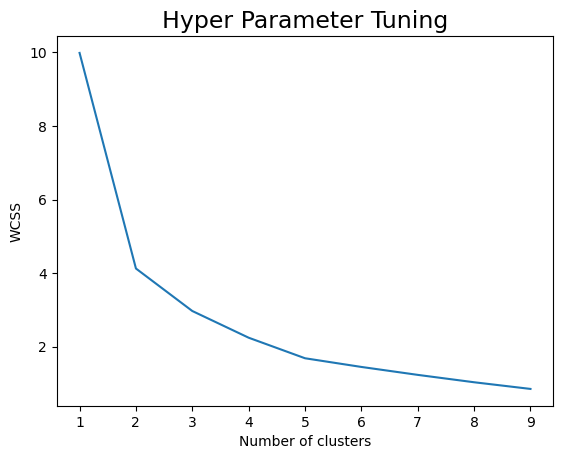

In [16]:
plt.plot(range(1,10),wcss)
plt.title("Hyper Parameter Tuning",fontsize = 17)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Make final model and show the results

In [17]:
final_model = KMeans(n_clusters=3,random_state =42)

In [18]:
final_model.fit(scaled_df)

KMeans(n_clusters=3, random_state=42)

In [19]:
final_model.labels_

array([2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [20]:
udf['Label'] = final_model.labels_

In [21]:
udf.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Label
Univ,,,,,,,
Brown,1310,89,22,13,22704,94,2
CalTech,1415,100,25,6,63575,81,2
CMU,1260,62,59,9,25026,72,0
Columbia,1310,76,24,12,31510,88,0
Cornell,1280,83,33,13,21864,90,0


In [22]:
grp = udf.groupby('Label')

In [23]:
for x,y in grp:
    print(y)
    print('_'*60)

               SAT  Top10  Accept  SFRatio  Expenses  GradRate  Label
Univ                                                                 
CMU           1260     62      59        9     25026        72      0
Columbia      1310     76      24       12     31510        88      0
Cornell       1280     83      33       13     21864        90      0
Georgetown    1255     74      24       12     20126        92      0
Northwestern  1260     85      39       11     28052        89      0
NotreDame     1255     81      42       13     15122        94      0
UCBerkeley    1240     95      40       17     15140        78      0
UChicago      1290     75      50       13     38380        87      0
UMichigan     1180     65      68       16     15470        85      0
UPenn         1285     80      36       11     27553        90      0
UVA           1225     77      44       14     13349        92      0
____________________________________________________________
             SAT  Top10  Acce

In [24]:
grp.agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Label,,,,,,
0,1258.181818,77.545455,41.727273,12.818182,22872.0,87.00
1,1061.500000,38.750000,70.000000,19.250000,9953.0,71.75
2,1357.500000,90.400000,24.100000,10.000000,39329.6,92.40
